In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
Data = pd.read_csv("Seshat Data.csv")

In [3]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [4]:
np.median(Data["SPC1"])

0.356081775

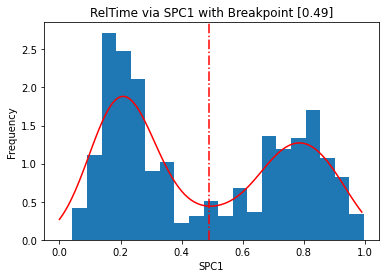

In [5]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


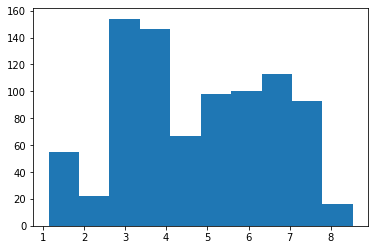

PolTerr


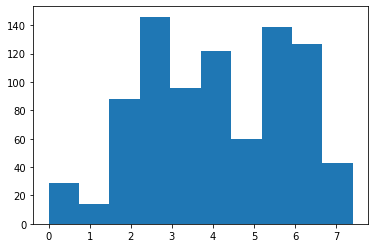

CapPop


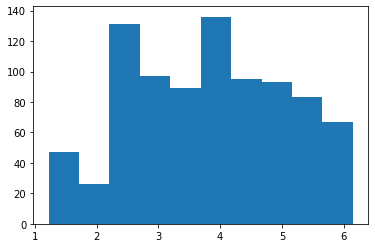

levels


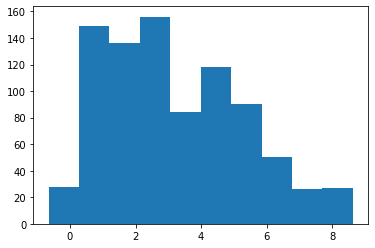

government


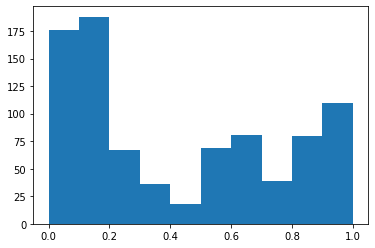

infrastr


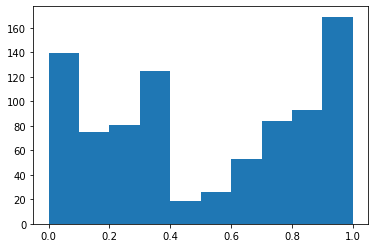

writing


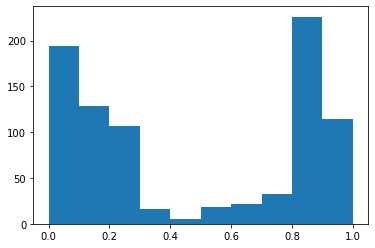

texts


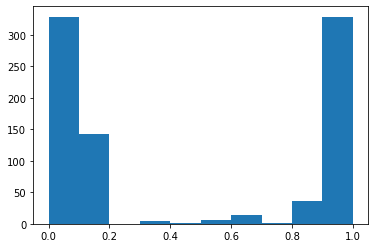

money


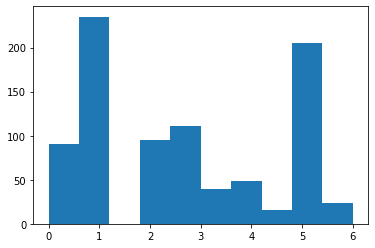

SPC1


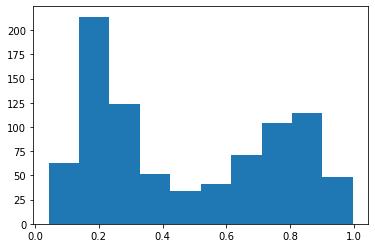

In [6]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [7]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [8]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [9]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Deccan large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Lena River Valley large enough? [False]
Is Southern China Hills large enough? [False]
Is Cahokia large enough? [False]
Is Middle Yellow River Valley large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Garo Hills large enough? [False]
Is Kapuasi Basin large enough? [False]
Is Konya Plain large enough? [ True]
Is Chuuk Islands large enough? [False]
Is Orkhon Valley large enough? [ True]
Is Kansai large enough? [ True]
Is Valley of Oaxaca large enough? [False]
Is Cambodian Basin large enough? [ True]
Is Central Java large enough? [ True]
Is Lowland Andes large enough? [False]
Is Cuzco large enough? [ True]
Is Latium large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Big Island Hawaii large enough? [False]
Is Iceland large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Sogdiana large enough? [ True]
Is Paris Basin large enough? [ True]
Is Finger Lakes large enough? [F

In [10]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [11]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Deccan -300
     Time      SPC1
76  -2400  0.155157
77  -2300  0.155157
78  -2200  0.155157
79  -2100  0.155157
80  -2000  0.155157
81  -1900  0.155157
82  -1800  0.155157
83  -1700  0.155157
84  -1600  0.155157
85  -1500  0.155157
86  -1400  0.155157
87  -1300  0.155157
88  -1200  0.155157
89  -1100  0.155157
90  -1000  0.155157
91   -900  0.196013
92   -800  0.196013
93   -700  0.196013
94   -600  0.270682
95   -500  0.270682
96   -400  0.270682
97   -300  0.270682
98   -200  0.309012
99   -100  0.309012
100     0  0.865242
101   100  0.309012
102   200  0.772671
103   300  0.773019
104   400  0.773918
105   500  0.775743
106   600  0.784965
107   800  0.722243
108   900  0.804721
109  1000  0.811569
110  1100  0.793230
111  1200  0.794156
112  1300  0.819299
113  1500  0.776915
114  1600  0.689394
115  1700  0.823462
116  1800  0.832824
117  1900  0.832812
118  2000  0.894917
 ________________________ 
Sogdiana -500
     Time      SPC1
608 -3000  0.262347
609 -2900  0.262347
610 -28

C:\Users\Tobias\AppData\Local\Temp/ipykernel_27684/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_27684/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_27684/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [12]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Deccan,Sogdiana,Ghanaian Coast,Konya Plain,Latium,Paris Basin,Orkhon Valley,Middle Yellow River Valley,Kansai,Yemeni Coastal Plain,Upper Egypt,Niger Inland Delta,Cambodian Basin,Susiana,Central Java,Iceland,Kachi Plain,Cuzco
T0,-300,-500,1800,-2000,-700,-200,500,-1800,400,400,-3100,1000,300,-3700,800,1300,-2500,1400


In [13]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
76,Deccan,InDecNL,-2400,2.731672,2.649571,3.150524,0.666667,0.100000,0.175000,0.100000,0.1,0.9,0.155157,0
77,Deccan,InDecNL,-2300,2.731672,2.649571,3.150524,0.666667,0.100000,0.175000,0.100000,0.1,0.9,0.155157,0
78,Deccan,InDecNL,-2200,2.731672,2.649571,3.150524,0.666667,0.100000,0.175000,0.100000,0.1,0.9,0.155157,0
79,Deccan,InDecNL,-2100,2.731672,2.649571,3.150524,0.666667,0.100000,0.175000,0.100000,0.1,0.9,0.155157,0
80,Deccan,InDecNL,-2000,2.731672,2.649571,3.150524,0.666667,0.100000,0.175000,0.100000,0.1,0.9,0.155157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Cuzco,PeCuzL1,-300,4.058377,2.747688,3.919993,4.000000,0.100000,0.440000,0.028571,0.0,1.0,0.296283,0
72,Cuzco,PeCuzL1,-200,4.058377,2.747688,3.919993,4.000000,0.100000,0.440000,0.028571,0.0,1.0,0.296283,0
73,Cuzco,PeCuzL2,-100,4.400132,3.373533,4.658418,4.000000,0.410000,0.610000,0.033333,0.0,1.0,0.374145,0
74,Cuzco,PeInca*,0,7.331048,6.105330,4.678394,5.591314,0.581818,0.758333,0.428571,0.0,1.8,0.594646,0


## Comparison

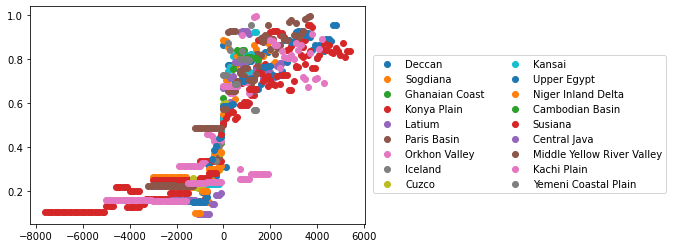

In [14]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

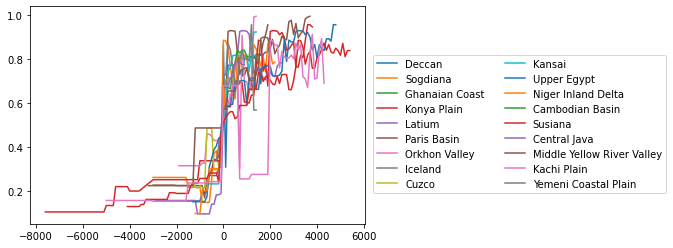

In [15]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [16]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

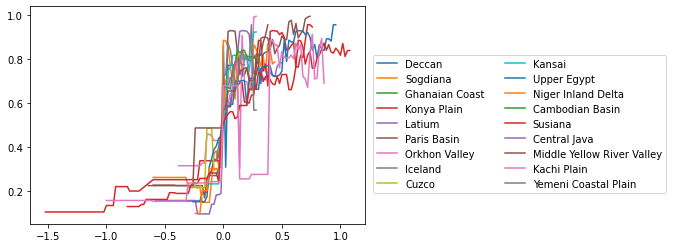

In [17]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [18]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [19]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641011e-01  1.93784867e-01  1.93749271e+01 -1.54321345e-02]


In [20]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410113222891 0.19378486719334456 19.374927117082198 -0.01543213453037441
-1.52 1.2600000000000025


In [21]:
print(p0)


[ 5.91641011e-01  1.93784867e-01  1.93749271e+01 -1.54321345e-02]


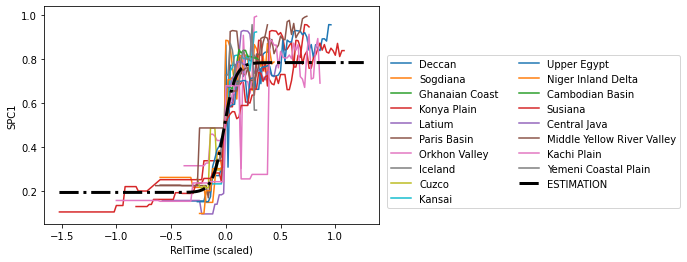

In [22]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

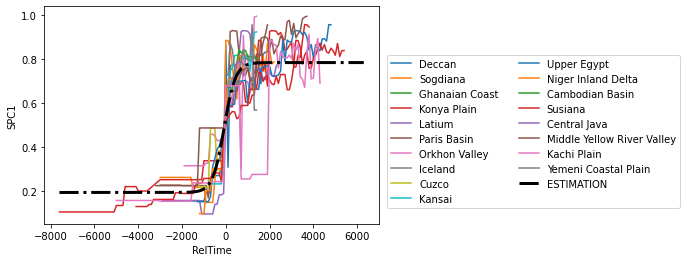

In [23]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [24]:
y_est = f(X,a_, b_, c_, d_)

In [25]:
RMSE = (np.sum((y_est-y)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583107725


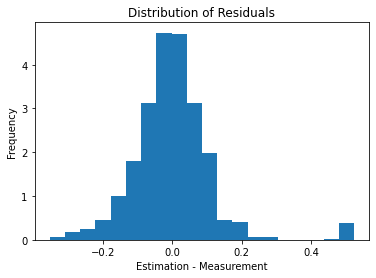

In [26]:
plt.hist(y_est-y,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [27]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [28]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.5659415025413281 0.18305750253406816 27.04938993931811 -0.019410855033459424
-----------------
0.5827803728789027 0.1989434574195301 25.1113608334289 -0.011230259727682447
-----------------
0.5934945376472838 0.18066450558141425 22.65120144319599 -0.01487069988005097
-----------------
0.7390035257050356 0.1696812796194324 7.203683416193077 -0.012740931355612179
-----------------
0.5618391880478902 0.19746669261785876 31.9805263002005 -0.016075592683668417
-----------------
0.559134612050802 0.21724284925994292 45.71995458873646 -0.014613575460254923
-----------------
0.6708440725890323 0.1917226601134377 10.909544803588382 -0.007864377825401093
-----------------
0.6260338257273683 0.17328724679940438 11.081136557427403 -0.010326720758952216
-----------------
0.6772264146544054 0.180246201155414 8.524452558045173 -0.008097922077064938
-----------------
0.6039304690924644 0.21102014545174755 15.883501692168407 -0.009565337756054759
-----------------
0.5576974593022584 0.191731404112894

0.630938626594612 0.17338281467852282 13.777393950375417 -0.00754459929275715
-----------------
0.6683894989032363 0.16525155620836723 7.790921766310078 -0.0036731490743829925
-----------------
0.5092218257202646 0.22644023356425858 40.113455409757265 -0.021411147803898554
-----------------
0.5532212880806342 0.2509016306708799 44.72385054744016 -0.00876895841603532
-----------------
0.624498833954731 0.19156434842387024 13.522906418142515 -0.020764034754224784
-----------------
0.5544826610340231 0.2057779148859549 29.848160192939535 -0.015616540436228541
-----------------
0.6129194629643698 0.204453885475423 15.279256313787185 -0.00954664706449141
-----------------
0.5786216329034678 0.18877571563393683 14.895766176034659 -0.027946836210506955
-----------------
0.5503034905948577 0.1959448020793109 23.073997772232516 -0.019448032099722446
-----------------
0.6176434899390657 0.20210584104652343 15.772226197843096 -0.014083141211440263
-----------------
0.6065613861695326 0.1917356740

0.5888353990327868 0.19160695920940585 21.271782670773618 -0.01387995578967584
-----------------
0.5868320285676711 0.19309029527138044 29.25588763582903 -0.013204687564897824
-----------------
0.5903763924735065 0.1851537641476116 20.22467171879318 -0.012348974354866095
-----------------
0.6353412864496142 0.1957283374340347 12.875590261643929 -0.011999425019099228
-----------------
0.639061515573896 0.17245103569645154 9.494550143774731 -0.018217117957384246
-----------------
0.6067182266174646 0.1977901454914286 19.29590430058495 -0.010949114547630591
-----------------
0.5525138399607527 0.21598145492426032 48.515354460988505 -0.012388675879784051
-----------------
0.6148351712996234 0.20319560948632787 18.664099415954233 -0.007024931783506741
-----------------
0.6131154565229316 0.1923544578682534 20.905092249355125 -0.008614146435005741
-----------------
0.6124652356114614 0.19283782216776987 15.358939683045104 -0.007563369593200598
-----------------
0.6121921431469587 0.177780260

0.6006364854751242 0.17433692216330424 26.599300783839986 -0.012459055430908925
-----------------
0.6209468891113603 0.18769481354482723 22.292067897808174 -0.014417233906065615
-----------------
0.6400238173937721 0.18898960344551674 19.394147439903136 -0.0017989795417951383
-----------------
0.5455794699699661 0.1911693786984536 42.955938599523456 -0.01299042345496518
-----------------
0.5947744190540444 0.1919373451304078 25.226295509386706 -0.0068008365676922415
-----------------
0.6434671147466038 0.17154950252785126 11.265354863689877 -0.0169060079265145
-----------------
0.522397833438422 0.213758589459227 138.1626951754337 -0.013941993806412487
-----------------
0.6127634355296181 0.18405795979120712 21.378560824380077 -0.009264471734246308
-----------------
0.56554435733395 0.20206307349310407 27.9618920586863 -0.018096926576841726
-----------------
0.6548215244248107 0.16993764051116259 10.65905477894582 -0.0001464025826066396
-----------------
0.611613113737817 0.18807095442

0.5384593908446668 0.19215491676041765 29.288905758730646 -0.02232670793355068
-----------------
0.6063985594461794 0.17879066505999222 17.494716109861837 -0.015253314715587428
-----------------
0.6354061308552517 0.18720784656709127 12.218927983153144 -0.005136662536527003
-----------------
0.5925679816320404 0.17971593734630223 27.281698261762955 -0.018511183879297028
-----------------
0.5896042336335708 0.19949696127615069 25.204112215837476 -0.00645943253153098
-----------------
0.6857879039739172 0.15052495912603098 6.50490508687668 0.01190008364907838
-----------------
0.5789461127395914 0.20786547060685892 23.25873294110326 -0.01473684451317878
-----------------
0.5674523334524755 0.2057884602863377 38.07969725155879 -0.012609932060017936
-----------------
0.6382280475962073 0.18573402943928186 12.517556381711312 -0.006065534188990542
-----------------
0.5937544487016815 0.19463012898219442 30.74455097315873 -0.009536346722498413
-----------------
0.5455433415645974 0.1960618422

0.6155943041036771 0.20002804019592998 26.40665918592078 -0.003120451287337771
-----------------
0.586251200161388 0.1745421971254638 19.53212039985131 -0.018518014080863503
-----------------
0.6388202057405779 0.18120252698157446 11.704179449070157 -0.006597928020964206
-----------------
0.6438063790263696 0.18865139549815121 11.545480206263818 -0.007586652960045589
-----------------
0.5902468615283082 0.20624466321196525 25.966567982709385 -0.010217252836901919
-----------------
0.6078471181669284 0.20006845936020254 25.853069835819 -0.01080510349550092
-----------------
0.7052254910030772 0.17037455626733114 8.798680168667866 -0.009362950471622212
-----------------
0.5986488451036918 0.21350354953720885 12.663157197034218 -0.014843291241505265
-----------------
0.5804700769228919 0.22308260504892624 23.71912514266547 -0.006118911093045229
-----------------
0.5837048192837111 0.18844280227055038 17.374053920704185 -0.015503972855174993
-----------------
0.5747542444973954 0.189288321

0.5797871321667313 0.23158489999784684 20.746289132334617 -0.005265120887857804
-----------------
0.6239863270344003 0.19341520987493202 15.896884143702627 -0.007737726266072965
-----------------
0.5962886930432287 0.1904114836896415 15.175211416205997 -0.01448999362640217
-----------------
0.6508620527474592 0.17951156380384106 11.140976262197926 -0.0026153045767858484
-----------------
0.5932996956826271 0.2008863454912902 23.039676384225807 -0.013216900982298427
-----------------
0.6003582739457527 0.18000866572441732 26.606564392887922 -0.007340424480551232
-----------------
0.5392632437595443 0.1997011281427371 63.07196311222491 -0.01408311362964463
-----------------
0.5267793070888966 0.19813383344646568 44.82876580455793 -0.019533487101879216
-----------------
0.574570137068547 0.19329414086306243 28.388585409205035 -0.009104399183824396
-----------------
0.5604929061431926 0.2167807213776827 29.22148317374131 -0.014222887943474198
-----------------
0.5930682677036585 0.21204578

0.5881130338591697 0.1975253607106545 27.370063995711078 -0.008941361556142249
-----------------
0.6232859343138966 0.1740494819249817 12.492453377032412 -0.012504422099633728
-----------------
0.5646559652725205 0.1959873504322584 32.66735631259975 -0.014079066971068166
-----------------
0.5846509559457836 0.1922045436118056 22.391043035888895 -0.010258484925754652
-----------------
0.5633574208688713 0.22493170793352724 22.268784852037147 -0.01789515306687726
-----------------
0.5925278463289319 0.19689423709975662 27.47814768472529 -0.010657537522967936
-----------------
0.6733295798440162 0.17536949023324785 8.594638156267512 -0.00956217673547826
-----------------
0.5303781309054302 0.2286943227674792 49.584830471724544 -0.012579442019038736
-----------------
0.5556741672619586 0.20139057122107584 24.651102239838956 -0.020604057133971614
-----------------
0.6200543739776923 0.18172820249577 22.743967483820946 -0.01007802729887488
-----------------
0.6168542831489051 0.1837785610292

0.6385456642050041 0.20101098623645525 15.993085793564953 -0.008497543427072212
-----------------
0.5945201400735185 0.18021636305453875 19.19871750497727 -0.015233233169970968
-----------------
0.578960209238485 0.1862437345933589 17.577263398617873 -0.02185477104690477
-----------------
0.6333219694357978 0.19220667833799404 12.39951812434843 -0.002900970299038287
-----------------
0.6322568289698448 0.18547545344603267 8.684377782456352 -0.02006717723533527
-----------------
0.6429764027331253 0.19148644036572995 11.895204596804884 -0.014929926489659488
-----------------
0.6071726097377219 0.1874189776783489 29.236597543280997 -0.007236370107915486
-----------------
0.6023356156437369 0.20565398107851304 26.124971486899113 -0.013413477051556873
-----------------
0.5722992065483692 0.19449741664757572 31.241804189787636 -0.012921777988214228
-----------------
0.5947818437936756 0.1965007537116667 23.272579089520573 -0.00953146884514171
-----------------
0.5779369175010882 0.203529247

0.5821705784650435 0.19754524462338532 23.671307440401584 -0.012977839084368548
-----------------
0.5799740869486661 0.20189408235982062 31.430684038855947 -0.020127828904181196
-----------------
0.5813517188135673 0.20679063305837656 20.964335471949717 -0.016860520668450108
-----------------
0.6176247712588091 0.1724379261821782 11.903829913796615 -0.010791545903447787
-----------------
0.5536397092104663 0.18642851914264158 28.590931412595527 -0.018042905983332743
-----------------
0.587563395161646 0.1947949131959104 15.320778258985806 -0.009674975312573478
-----------------
0.6531218012581952 0.16785605207738194 9.04150267917425 -0.019218541578838334
-----------------
0.5473401994852816 0.1952241584601889 36.71467685115111 -0.016838577523890588
-----------------
0.5919956415718637 0.20617398082838861 20.931958038355763 -0.013494215902817653
-----------------
0.5717320250882896 0.21177128176145596 32.34072948621655 -0.011037102726836634
-----------------
0.642592458067072 0.17069400

0.6028671332091239 0.19659531511691924 14.845749718960164 -0.02206354446429452
-----------------
0.6110757300081381 0.17914893130490098 26.584654789157376 -0.008893705696551428
-----------------
0.5624420207666083 0.18968655980286372 21.181023135660016 -0.016935225483968006
-----------------
0.6156616213349867 0.19396919959550646 20.41046342228199 -0.01207527975603675
-----------------
0.5896089583060999 0.21157580388815628 20.276984493568353 -0.008766677144940867
-----------------
0.5549173164959976 0.1994455418108603 36.70737933482067 -0.014411050690319772
-----------------
0.6189061857191404 0.20313370118157492 16.34090319734618 -0.006725170572573804
-----------------
0.6278388523547399 0.17171878266908538 11.855255180273613 -0.003345222545697756
-----------------
0.5937341381665776 0.21031674917426585 28.261690598324787 -0.012016391590147278
-----------------
0.5743128344790772 0.19482269859987184 37.76303929479983 -0.01364169487380667
-----------------
0.6075562239602132 0.1795795

0.6327795064980423 0.2059148553876559 10.18472753469148 -0.014166919569620249
-----------------
0.557387411653751 0.22301839102146526 32.76883388579213 -0.016599375325205463
-----------------
0.5524602976210558 0.1810926813956002 47.28405966914854 -0.015337909572399114
-----------------
0.6094124287181623 0.17129391085139545 17.249190665077844 -0.023410641116526916
-----------------
0.620807276312241 0.165823059192385 11.671195553257114 -0.00583405656978757
-----------------
0.5456519955407378 0.20702329526052363 32.543139623340124 -0.014642158071355096
-----------------
0.6167256880072692 0.18089511651978385 13.165976860869748 -0.020204626290643863
-----------------
0.5491177922964916 0.2147927778766735 33.75512577261429 -0.021899889539073757
-----------------
0.5543821906300713 0.19372094652441138 55.26282556971871 -0.012943565708760946
-----------------
0.6490564906438565 0.18007338490156194 12.7665044058676 -0.006941001882026295
-----------------
0.5905523068397409 0.20686336426889

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [29]:
print(negCcount)

0


In [30]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

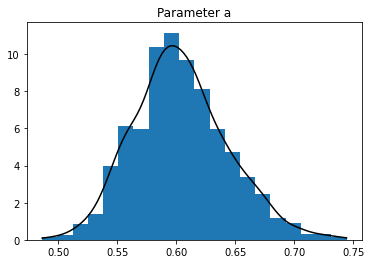

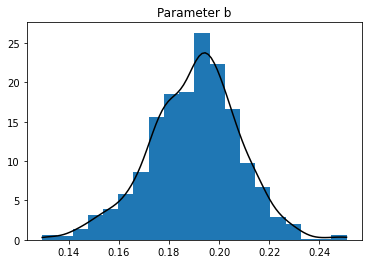

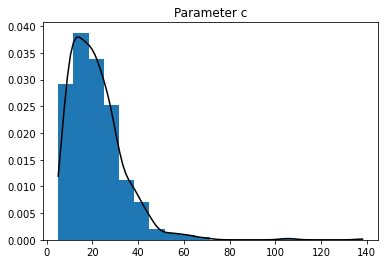

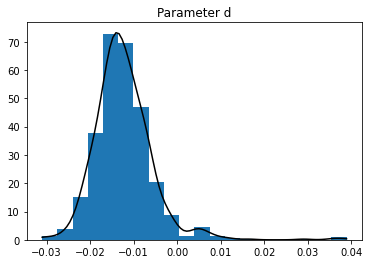

In [31]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [32]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.19009054786376017 0.018067369976178912
0.7937050250514148 0.030829795418317096
0.2081579178399391 0.7628752296330977
0.193784867193474 0.785425878157019


In [33]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [34]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_27684/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [35]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1786.0 years.


In [36]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [37]:
print(np.quantile(Params["d"],0.975))


0.004062040118483407


In [38]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-57.432468027087666, 0.0)

##### Bootstrap for the Time Interval

In [39]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [40]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.5827803728789027 0.1989434574195301 25.1113608334289 -0.011230259727682447     fjac: array([[-1.]])
     fun: array([1.49880108e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.52715701e-10])
       r: array([-0.22772689])
  status: 1
 success: True
       x: array([-0.17574141])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.27644562e-11])
       r: array([-0.45800522])
  status: 1
 success: True
       x: array([0.12410667])
-----------------
0.5934945376472838 0.18066450558141425 22.65120144319599 -0.01487069988005097     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([5.58775248e-13])
       r: array([-0.59390984])
  status: 1
 success: True
       x: array([-0.14840223])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.12813134e-11])
       r: array([-

0.5886867892091576 0.18959244668053152 19.730143926067733 -0.014923161674596624     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.36817249e-12])
       r: array([-0.35474767])
  status: 1
 success: True
       x: array([-0.18849238])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.73794354e-13])
       r: array([-0.29597066])
  status: 1
 success: True
       x: array([0.16838779])
-----------------
0.5941229794097432 0.18076542308794497 25.744189330974176 -0.008656744540479837     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([1.75948145e-12])
       r: array([-0.6726841])
  status: 1
 success: True
       x: array([-0.12633824])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.88737914e-14])
       r: array([-0.30301599])
  status

0.664120840345822 0.18509637041534613 9.254631511991677 -0.00024535605533125966     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.54401492e-12])
       r: array([-0.20601499])
  status: 1
 success: True
       x: array([-0.3595201])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.19583232e-11])
       r: array([-0.69517781])
  status: 1
 success: True
       x: array([0.20515183])
-----------------
0.6399693670014727 0.1962747906912107 13.252423109965479 -0.013386909873232994     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.52012863e-12])
       r: array([-0.15455622])
  status: 1
 success: True
       x: array([-0.3127705])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.27192701e-11])
       r: array([-0.8608450

0.5858318047136698 0.19997490785670916 39.42596078595558 -0.013693051103610103     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-1.32498734e-11])
       r: array([-0.31811574])
  status: 1
 success: True
       x: array([-0.12166521])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.28784761e-11])
       r: array([-0.86870521])
  status: 1
 success: True
       x: array([0.06748675])
-----------------
0.5899200269628911 0.1884049417123244 17.574045046713913 -0.007932048013534103     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.32562319e-12])
       r: array([-0.33551582])
  status: 1
 success: True
       x: array([-0.19927247])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.64266387e-12])
       r: ar

C:\Users\Tobias\AppData\Local\Temp/ipykernel_27684/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.6129194629643698 0.204453885475423 15.279256313787185 -0.00954664706449141     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-6.22321639e-12])
       r: array([-0.05625298])
  status: 1
 success: True
       x: array([-0.3435125])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([9.2521546e-12])
       r: array([-0.75865115])
  status: 1
 success: True
       x: array([0.14274791])
-----------------
0.5786216329034678 0.18877571563393683 14.895766176034659 -0.027946836210506955     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.79245507e-13])
       r: array([-0.27904171])
  status: 1
 success: True
       x: array([-0.25366349])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.57800439e-11])
       r: array(

0.6421915562493979 0.180358664790719 12.117610628705783 -0.0061655610763786985     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.14786e-14])
       r: array([-0.32227849])
  status: 1
 success: True
       x: array([-0.26163049])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.01085806e-12])
       r: array([-0.65592338])
  status: 1
 success: True
       x: array([0.18186199])
-----------------
0.6133298472451412 0.17733993181367702 22.690874906799948 -0.013151683362464162     fjac: array([[-1.]])
     fun: array([-5.82867088e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.41441914e-10])
       r: array([-0.66415282])
  status: 1
 success: True
       x: array([-0.14268618])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.1698531e-11])
    

       x: array([-0.2183729])     fjac: array([[-1.]])
     fun: array([9.99200722e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.68235759e-10])
       r: array([-0.53916834])
  status: 1
 success: True
       x: array([0.12936198])
-----------------
0.6185432791151158 0.17013205317059815 12.437751499047462 -0.02413819034758392     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.39627207e-11])
       r: array([-0.44388117])
  status: 1
 success: True
       x: array([-0.24328176])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.53782551e-11])
       r: array([-0.3075109])
  status: 1
 success: True
       x: array([0.22786739])
-----------------
0.6622221721280974 0.1981102161196016 10.757737084700775 -0.017184268278898778     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution con

0.5970323338524874 0.19579900629801403 22.213198298526116 -0.008440877058346887     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.16808818e-14])
       r: array([-0.26884799])
  status: 1
 success: True
       x: array([-0.1820618])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.90336677e-13])
       r: array([-0.63203341])
  status: 1
 success: True
       x: array([0.1239471])
-----------------
0.6439162958111292 0.16046866262903878 8.31958443358232 -0.007585657073596574     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.76178516e-12])
       r: array([-0.3673707])
  status: 1
 success: True
       x: array([-0.31119643])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.1855408e-14])
       r: array([-0.32308129])
  status: 1


0.6176400917740098 0.17921438942026915 13.222571605314625 -0.0052102502984458544     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.2922996e-12])
       r: array([-0.36477372])
  status: 1
 success: True
       x: array([-0.23304522])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.83946216e-13])
       r: array([-0.42457544])
  status: 1
 success: True
       x: array([0.20984398])
-----------------
0.6113116059273986 0.20687663225847083 20.092976229945602 -0.00907357760591896     fjac: array([[-1.]])
     fun: array([1.94289029e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.98392969e-11])
       r: array([-0.02569113])
  status: 1
 success: True
       x: array([-0.3159293])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.55111512e-14])
       r: arr

       x: array([-0.10076682])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.77395901e-15])
       r: array([-0.11925437])
  status: 1
 success: True
       x: array([0.12978473])
-----------------
0.6151629585087685 0.1927103482785028 12.874579714914372 -0.015412246887400807     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.9904525e-14])
       r: array([-0.19388681])
  status: 1
 success: True
       x: array([-0.29961597])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.93842728e-12])
       r: array([-0.53695445])
  status: 1
 success: True
       x: array([0.18182183])
-----------------
0.6006938901713529 0.187638622882497 15.398536515325068 -0.019983394219382587     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
  

0.5807335630778431 0.19050188078252617 27.98385401054273 -0.019345298789308615     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-3.33559291e-11])
       r: array([-0.47906097])
  status: 1
 success: True
       x: array([-0.14307163])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.81597009e-14])
       r: array([-0.23058304])
  status: 1
 success: True
       x: array([0.13168134])
-----------------
0.6493977670649693 0.17945493798685763 14.942326121217285 -0.004773369554906892     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.88578059e-14])
       r: array([-0.40993265])
  status: 1
 success: True
       x: array([-0.21048689])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.23581162e-11])
       r: ar

       x: array([-0.3053393])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.06001907e-11])
       r: array([-0.49433413])
  status: 1
 success: True
       x: array([0.19010875])
-----------------
0.6150971043875896 0.17846519433082458 14.637654088929978 -0.020834681746542315     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.30488978e-14])
       r: array([-0.41365075])
  status: 1
 success: True
       x: array([-0.22451492])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.11212151e-11])
       r: array([-0.42677729])
  status: 1
 success: True
       x: array([0.1804791])
-----------------
0.6315042160129685 0.18689533293254595 13.81257007239527 -0.012878706354474724     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
   

0.5915574355283914 0.1954909525875618 36.507758689612096 -0.011375266518045872     fjac: array([[-1.]])
     fun: array([-9.71445147e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.25746913e-10])
       r: array([-0.45253681])
  status: 1
 success: True
       x: array([-0.11606851])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-7.16782189e-12])
       r: array([-0.84644477])
  status: 1
 success: True
       x: array([0.07506647])
-----------------
0.6546892820448563 0.15219320867598937 7.4158837632722205 -0.01345434419597576     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.40369399e-12])
       r: array([-0.37955013])
  status: 1
 success: True
       x: array([-0.33304948])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([7.81597009e-14])
       r: a

0.601302498514703 0.19555777059650564 20.859530570825537 -0.014715456873869848     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.86605453e-11])
       r: array([-0.25732505])
  status: 1
 success: True
       x: array([-0.1990059])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.64555045e-12])
       r: array([-0.66884471])
  status: 1
 success: True
       x: array([0.12023478])
-----------------
0.6310250130283116 0.18351047985127192 15.789328105671943 -0.010166430505966046     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.93223215e-12])
       r: array([-0.373966])
  status: 1
 success: True
       x: array([-0.21301419])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.08925091e-11])
       r: array

0.6367010956628082 0.17240831344720778 10.472894518279041 -0.011857797553888497     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.34631236e-13])
       r: array([-0.35337991])
  status: 1
 success: True
       x: array([-0.28131291])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.38693567e-13])
       r: array([-0.44904506])
  status: 1
 success: True
       x: array([0.23135999])
-----------------
0.6013635637725034 0.1969025296576726 24.8101621859985 -0.0072257457047039874     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([4.99600361e-15])
       r: array([-0.27402149])
  status: 1
 success: True
       x: array([-0.16681595])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.52451401e-12])
       r: array([-0.8263784])
  status

0.6354061308552517 0.18720784656709127 12.218927983153144 -0.005136662536527003     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.95184424e-11])
       r: array([-0.24754762])
  status: 1
 success: True
       x: array([-0.28164172])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.72542014e-13])
       r: array([-0.6613167])
  status: 1
 success: True
       x: array([0.18027643])
-----------------
0.5925679816320404 0.17971593734630223 27.281698261762955 -0.018511183879297028     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([4.15020796e-12])
       r: array([-0.7387022])
  status: 1
 success: True
       x: array([-0.12801358])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.31006317e-14])
       r: arra

0.5629727281563942 0.20523401502156838 42.114999652728514 -0.01556001857658763     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([1.18544063e-13])
       r: array([-0.12250064])
  status: 1
 success: True
       x: array([-0.1403399])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-6.33462172e-11])
       r: array([-0.22240856])
  status: 1
 success: True
       x: array([0.09485386])
-----------------
0.6123461884767899 0.18638414522509023 16.791802886344218 -0.01955943473501149     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.10115561e-11])
       r: array([-0.35262107])
  status: 1
 success: True
       x: array([-0.21610689])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.28355137e-13])
  

0.6038581067822346 0.18698404614134884 13.699702188127812 -0.017760625605026507     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.43891582e-13])
       r: array([-0.27990447])
  status: 1
 success: True
       x: array([-0.25972774])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.36002321e-13])
       r: array([-0.36539398])
  status: 1
 success: True
       x: array([0.20303952])
-----------------
0.623457102800427 0.18166110008804268 18.420958386194755 -0.00906825540190206     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.02615702e-14])
       r: array([-0.46735275])
  status: 1
 success: True
       x: array([-0.17815967])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.04036787e-12])
       r: array([-0.7254315]

0.702189557064485 0.1613640131462487 7.163377493665326 -0.009501764765434502     fjac: array([[-1.]])
     fun: array([4.30211422e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.56726387e-10])
       r: array([-0.31286694])
  status: 1
 success: True
       x: array([-0.37797127])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.15560783e-10])
       r: array([-0.61779452])
  status: 1
 success: True
       x: array([0.24003339])
-----------------
0.5942780991537361 0.17590680574090184 26.172507698407124 -0.013043811896204842     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([9.24260668e-14])
       r: array([-0.79828412])
  status: 1
 success: True
       x: array([-0.12224226])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.42663

0.5837048192837111 0.18844280227055038 17.374053920704185 -0.015503972855174993     fjac: array([[-1.]])
     fun: array([1.05471187e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.32099887e-10])
       r: array([-0.33096486])
  status: 1
 success: True
       x: array([-0.20853033])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.17350574e-13])
       r: array([-0.15853993])
  status: 1
 success: True
       x: array([0.22199622])
-----------------
0.5747542444973954 0.18928832101395324 31.64775565658017 -0.012223806168582086     fjac: array([[-1.]])
     fun: array([-1.38777878e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([5.27231592e-11])
       r: array([-0.57757624])
  status: 1
 success: True
       x: array([-0.1191195])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.1448

0.5704342759482759 0.19797947489463766 24.43730585475625 -0.018426896243076602     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.85743651e-13])
       r: array([-0.24429544])
  status: 1
 success: True
       x: array([-0.1824434])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.45760079e-11])
       r: array([-0.13403305])
  status: 1
 success: True
       x: array([0.17082939])
-----------------
0.6517934383073607 0.1752703828252738 11.954587626143832 -0.008283255645238862     fjac: array([[-1.]])
     fun: array([2.44249065e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.27346344e-10])
       r: array([-0.37332221])
  status: 1
 success: True
       x: array([-0.25378395])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([9.40358902e-14])
    

0.6967223815212706 0.17770584812408907 9.301079708868645 -0.005539564928723114     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.32869279e-14])
       r: array([-0.27085751])
  status: 1
 success: True
       x: array([-0.33727971])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.24080804e-11])
       r: array([-0.87143889])
  status: 1
 success: True
       x: array([0.17265497])
-----------------
0.5657851430073535 0.205943817262586 33.8506286042618 -0.013559613651425719     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.91353616e-15])
       r: array([-0.07465539])
  status: 1
 success: True
       x: array([-0.17720346])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.52255986e-12])
       r: array([-0.29501423])
  status:

0.6055151452344083 0.1925534732668182 33.55675829860274 -0.008197835801280848     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-5.48738832e-12])
       r: array([-0.51013973])
  status: 1
 success: True
       x: array([-0.11644475])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.65945035e-12])
       r: array([-1.11233632])
  status: 1
 success: True
       x: array([0.07480608])
-----------------
0.5820699341518021 0.1995798846593847 22.639613789637107 -0.012776132843907774     fjac: array([[-1.]])
     fun: array([-2.77555756e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.36524714e-11])
       r: array([-0.19134044])
  status: 1
 success: True
       x: array([-0.19840382])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.95425964e-13]

0.6003582739457527 0.18000866572441732 26.606564392887922 -0.007340424480551232     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([1.88010163e-11])
       r: array([-0.71383925])
  status: 1
 success: True
       x: array([-0.12054495])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.7902681e-11])
       r: array([-0.45183359])
  status: 1
 success: True
       x: array([0.12444026])
-----------------
0.574570137068547 0.19329414086306243 28.388585409205035 -0.009104399183824396     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([5.07177633e-13])
       r: array([-0.41104562])
  status: 1
 success: True
       x: array([-0.13691933])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.96330746e-11])
       r: arr

0.6188106938647295 0.16778951223457023 11.862911999682627 -0.011297517781117525     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.71747119e-13])
       r: array([-0.44764651])
  status: 1
 success: True
       x: array([-0.23571892])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.26676447e-13])
       r: array([-0.27065674])
  status: 1
 success: True
       x: array([0.2603202])
-----------------
0.5998000714520865 0.20185327049382928 12.535582610105662 -0.01648406032564898     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.2155138e-11])
       r: array([-0.07820191])
  status: 1
 success: True
       x: array([-0.37903143])     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.4132

0.5913029264227869 0.17416518857635271 32.389578422614896 -0.01336521201998692     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.03417275e-13])
       r: array([-1.03771542])
  status: 1
 success: True
       x: array([-0.09971939])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.13353771e-13])
       r: array([-0.08361422])
  status: 1
 success: True
       x: array([0.15413195])
-----------------
0.6142191240258872 0.18751022551003196 24.464999761640314 -0.008416082074631766     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.60074731e-12])
       r: array([-0.48816455])
  status: 1
 success: True
       x: array([-0.14569603])     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([9.49087475e-11])
       r: ar

0.5995727205610448 0.2006698286077727 26.7858823478797 -0.010118307084662536     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.22835631e-11])
       r: array([-0.19807054])
  status: 1
 success: True
       x: array([-0.17327649])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-3.92051946e-11])
       r: array([-0.93853458])
  status: 1
 success: True
       x: array([0.09109437])
-----------------
0.563995382234696 0.2039456366969578 36.86471813457098 -0.012806817529316304     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-3.20585225e-12])
       r: array([-0.15412448])
  status: 1
 success: True
       x: array([-0.14544163])     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.15899545e-11])
 

0.6042644218450061 0.18792729893659288 16.420997469953544 -0.01226835903301628     fjac: array([[-1.]])
     fun: array([3.05311332e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.26667623e-11])
       r: array([-0.3210859])
  status: 1
 success: True
       x: array([-0.21705261])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.07913678e-13])
       r: array([-0.45805016])
  status: 1
 success: True
       x: array([0.16897089])
-----------------
0.6707803092624842 0.17433409621491067 9.75273872076172 -0.0169467263439917     fjac: array([[-1.]])
     fun: array([8.32667268e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.77340725e-10])
       r: array([-0.31324256])
  status: 1
 success: True
       x: array([-0.31794279])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.13575815e-13])
       

       x: array([-0.19962066])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-6.43357589e-11])
       r: array([-0.80484216])
  status: 1
 success: True
       x: array([0.10838499])
-----------------
0.6750445970529705 0.16376008004591158 9.324585652462398 -0.0019573142823107004     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.97508676e-13])
       r: array([-0.38676315])
  status: 1
 success: True
       x: array([-0.28653351])     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.05303449e-10])
       r: array([-0.62837572])
  status: 1
 success: True
       x: array([0.21956987])
-----------------
0.6122639737169259 0.1990730832586037 12.511206690695527 -0.00841400987682561     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'


0.6055212980699886 0.18984082324343585 13.582869051652148 -0.02138680476335448     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.72166742e-11])
       r: array([-0.24127315])
  status: 1
 success: True
       x: array([-0.27667439])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.14616761e-10])
       r: array([-0.41759248])
  status: 1
 success: True
       x: array([0.18991679])
-----------------
0.6968902040303026 0.15364386303260158 7.499162216694137 -2.5208171367475565e-06     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.66728869e-12])
       r: array([-0.37683082])
  status: 1
 success: True
       x: array([-0.32893466])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.06421555e-14])
       r: arr

       x: array([-0.18791657])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.29496455e-14])
       r: array([-0.14723722])
  status: 1
 success: True
       x: array([0.1812015])
-----------------
0.5724625940467787 0.1926555028670079 38.46902542041518 -0.01133109377118539     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([2.31598074e-12])
       r: array([-0.58021346])
  status: 1
 success: True
       x: array([-0.10443192])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.35736977e-11])
       r: array([-0.08594242])
  status: 1
 success: True
       x: array([0.13263582])
-----------------
0.6243510500122873 0.1706961531271599 14.761892925832747 -0.015732121805522553     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
   

0.5947818437936756 0.1965007537116667 23.272579089520573 -0.00953146884514171     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.72040201e-12])
       r: array([-0.26597488])
  status: 1
 success: True
       x: array([-0.17764692])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.11436482e-11])
       r: array([-0.62953513])
  status: 1
 success: True
       x: array([0.11905793])
-----------------
0.5779369175010882 0.20352924745598264 32.35032749153909 -0.011901598866185172     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.86921051e-12])
       r: array([-0.14853952])
  status: 1
 success: True
       x: array([-0.1608693])     fjac: array([[-1.]])
     fun: array([-1.88737914e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-2.40055198e-10])
  

0.6448150803565322 0.20088463871096063 12.658811201056546 -0.008991371920238217     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-7.55950857e-13])
       r: array([-0.09103258])
  status: 1
 success: True
       x: array([-0.36237468])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.27640129e-12])
       r: array([-0.91378808])
  status: 1
 success: True
       x: array([0.1422678])
-----------------
0.6191265567644991 0.1854418293722364 17.991248054608494 -0.013914151467127015     fjac: array([[-1.]])
     fun: array([-1.2490009e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.09448264e-10])
       r: array([-0.39369333])
  status: 1
 success: True
       x: array([-0.19555001])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.29036798e-12])
 

0.6379526468444915 0.17402886102077458 18.41013404895837 -0.006937673566149776     fjac: array([[-1.]])
     fun: array([2.22044605e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.27540217e-10])
       r: array([-0.5947027])
  status: 1
 success: True
       x: array([-0.16300025])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.36953823e-11])
       r: array([-0.83446561])
  status: 1
 success: True
       x: array([0.12799771])
-----------------
0.6010680285274006 0.17838964707482902 15.717407432094872 -0.01135092375993396     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.90356064e-12])
       r: array([-0.44470787])
  status: 1
 success: True
       x: array([-0.19932537])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.75713946e-11])
    

0.6401659937527039 0.16343243028628288 8.467760735761466 -0.03074527319117584     fjac: array([[-1.]])
     fun: array([1.94289029e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.6167351e-11])
       r: array([-0.35226583])
  status: 1
 success: True
       x: array([-0.33646458])     fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.10014561e-10])
       r: array([-0.32289965])
  status: 1
 success: True
       x: array([0.28683606])
-----------------
0.5911958312065752 0.17862976630580557 13.395299775684933 -0.0171030655720306     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.20654092e-12])
       r: array([-0.37578298])
  status: 1
 success: True
       x: array([-0.23699857])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.19141363e-11])
     

0.5919956415718637 0.20617398082838861 20.931958038355763 -0.013494215902817653     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.22044605e-15])
       r: array([-0.04138852])
  status: 1
 success: True
       x: array([-0.28556905])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.06127329e-11])
       r: array([-0.69473457])
  status: 1
 success: True
       x: array([0.11828059])
-----------------
0.642592458067072 0.17069400160756 11.550828075776522 -0.013314909636758543     fjac: array([[-1.]])
     fun: array([1.1379786e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.15348184e-10])
       r: array([-0.40751221])
  status: 1
 success: True
       x: array([-0.25416887])     fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.74084192e-10])
   

0.6333113037242101 0.18341034870599626 13.591243189584103 -0.006424747602389092     fjac: array([[-1.]])
     fun: array([1.94289029e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.90015259e-11])
       r: array([-0.32320787])
  status: 1
 success: True
       x: array([-0.24204516])     fjac: array([[-1.]])
     fun: array([-4.10782519e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.3079808e-10])
       r: array([-0.66962066])
  status: 1
 success: True
       x: array([0.16839142])
-----------------
0.5862040044331607 0.19821424213226077 26.783942775757037 -0.014772270933330249     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([4.67542671e-13])
       r: array([-0.26181305])
  status: 1
 success: True
       x: array([-0.16634155])     fjac: array([[-1.]])
     fun: array([7.77156117e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.3532

0.701512797787622 0.15727997517192505 6.518818616954536 -0.0010411102773905882     fjac: array([[-1.]])
     fun: array([1.72084569e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.27695593e-10])
       r: array([-0.30761142])
  status: 1
 success: True
       x: array([-0.39198911])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.68594044e-14])
       r: array([-0.53977629])
  status: 1
 success: True
       x: array([0.28163633])
-----------------
0.5891765830760005 0.2003278728651265 24.754541855429313 -0.01335968259347112     fjac: array([[-1.]])
     fun: array([-1.80411242e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.54763369e-10])
       r: array([-0.19125547])
  status: 1
 success: True
       x: array([-0.18736326])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.587618

0.6234696475414548 0.19738569731057642 18.824269269202315 -0.01061289957849039     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.33199007e-12])
       r: array([-0.19927569])
  status: 1
 success: True
       x: array([-0.22527731])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.13886711e-11])
       r: array([-0.98993299])
  status: 1
 success: True
       x: array([0.1103794])
-----------------
0.5930929391257113 0.20525008572029563 17.970803008770392 -0.01084990329132577     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-4.38538095e-14])
       r: array([-0.05199988])
  status: 1
 success: True
       x: array([-0.3064977])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.94587704e-11])
   

       x: array([-0.3091545])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.90860694e-12])
       r: array([-0.62528025])
  status: 1
 success: True
       x: array([0.18766213])
-----------------
0.7008031995480044 0.16493738998673346 8.939582833618068 -3.556882586434852e-05     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.67633701e-12])
       r: array([-0.36254487])
  status: 1
 success: True
       x: array([-0.30455257])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.44071471e-13])
       r: array([-0.78459656])
  status: 1
 success: True
       x: array([0.19684899])
-----------------
0.5972769629646582 0.20204793512908548 19.509702103242034 -0.02029272452077388     fjac: array([[-1.]])
     fun: array([1.38777878e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array

0.6079495076908359 0.1768995554445989 12.299075675660852 -0.014555261902919107     fjac: array([[-1.]])
     fun: array([1.55431223e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.42593973e-10])
       r: array([-0.36468447])
  status: 1
 success: True
       x: array([-0.25156656])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.6510352e-14])
       r: array([-0.2604896])
  status: 1
 success: True
       x: array([0.25241])
-----------------
0.5871335187190967 0.18490918679902826 29.813106536874454 -0.011735029933983489     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-9.21818177e-13])
       r: array([-0.66567132])
  status: 1
 success: True
       x: array([-0.11868797])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.53633789e-11])
       r: array(

       x: array([-0.14282901])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.7925661e-12])
       r: array([-0.09780769])
  status: 1
 success: True
       x: array([0.13314666])
-----------------
0.5822827556573412 0.19605904331853952 26.96646373088693 -0.011293789338687197     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.97064587e-14])
       r: array([-0.31948462])
  status: 1
 success: True
       x: array([-0.15416927])     fjac: array([[-1.]])
     fun: array([-3.21964677e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.02847303e-10])
       r: array([-0.40599587])
  status: 1
 success: True
       x: array([0.12225558])
-----------------
0.5955539052331977 0.19552617749079873 23.56419239365585 -0.010344790195211787     fjac: array([[-1.]])
     fun: array([3.60822483e-15])
 message: 'The solution converged.'
    nfev: 9
 

       x: array([-0.32093932])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.98965322e-13])
       r: array([-0.47621787])
  status: 1
 success: True
       x: array([0.25090586])
-----------------
0.5983302169697535 0.19724009718021657 18.35346657730553 -0.011041978927227861     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.27999866e-12])
       r: array([-0.19672373])
  status: 1
 success: True
       x: array([-0.22818519])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([8.63165095e-12])
       r: array([-0.56727773])
  status: 1
 success: True
       x: array([0.14428151])
-----------------
0.6203225383057343 0.20396015557198358 16.570155842918687 -0.006272238183354582     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: arr

0.5981484216823229 0.19612381512966692 26.471177378091205 -0.010808165105197649     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.67785794e-13])
       r: array([-0.3121479])
  status: 1
 success: True
       x: array([-0.15760067])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.69206879e-12])
       r: array([-0.78749049])
  status: 1
 success: True
       x: array([0.09848838])
-----------------
0.6786948480396264 0.1616430445456486 8.81855746762013 -0.021348861401606866     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.52861335e-11])
       r: array([-0.38208144])
  status: 1
 success: True
       x: array([-0.31724782])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.62324615e-11])
       r: array([-0.60514314])
  status:

In [41]:
print(Successes)
print(Params2.round(2))

717
       a     b      c     d    T1    T2
0   0.58  0.20  25.11 -0.01 -0.18  0.12
0   0.59  0.18  22.65 -0.01 -0.15  0.16
0   0.74  0.17   7.20 -0.01 -0.42  0.18
0   0.67  0.19  10.91 -0.01 -0.35  0.15
0   0.63  0.17  11.08 -0.01 -0.27  0.24
..   ...   ...    ...   ...   ...   ...
0   0.60  0.21  37.46 -0.01 -0.21  0.06
0   0.62  0.19  15.15 -0.01 -0.25  0.15
0   0.58  0.20  29.96 -0.02 -0.16  0.11
0   0.65  0.17   8.99 -0.01 -0.30  0.27
0   0.58  0.20  31.30 -0.01 -0.14  0.11

[717 rows x 6 columns]


In [42]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.41361294240735164, 0.12825442712515672)

In [43]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.41361294240735164

In [44]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2068.0 ± 641.0 years.


In [45]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [46]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

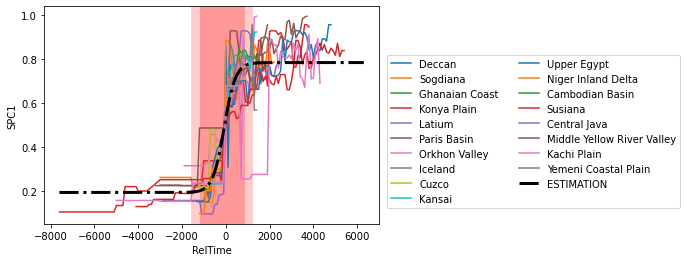

In [47]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval")
plt.show()

In [48]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1573.93012079146 -1193.1635155706836 874.9011964660756 1219.8303475147775


In [49]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")

In [50]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [51]:
np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))